### Squid Game Sentiment Analysis

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
data = pd.read_csv("squid games reviews.csv")
data.head()

Unnamed: 0       User_name  \
0           0  Leofwine_draca   
1           1         kosmasp   
2           2        Tweekums   
3           3       FeastMode   
4           4    Irishchatter   

                                        Review title Review Rating  \
0                                   A new TV classic         10/10   
1                                        Just a game          9/10   
2                                   Games to die for         10/10   
3  if you think this is good, PLEASE watch the ko...          5/10   
4        It started off strong but ended disoriented          7/10   

       Review date                                        Review_body  
0   9 October 2021  Just finished up SQUID GAME, the Korean TV sho...  
1  10 October 2021  Well multiple games actually, but even that yo...  
2  11 October 2021  This runaway hit from South Korea is centred o...  
3   9 October 2021  I went into this show knowing absolutely nothi...  
4   8 October 2021  I honestly don't know wtf the main character n...

In [29]:
data.shape

(1185, 6)

In [30]:
del data['Unnamed: 0']

In [31]:
data.head(2)

User_name      Review title Review Rating      Review date  \
0  Leofwine_draca  A new TV classic         10/10   9 October 2021   
1         kosmasp       Just a game          9/10  10 October 2021   

                                         Review_body  
0  Just finished up SQUID GAME, the Korean TV sho...  
1  Well multiple games actually, but even that yo...

In [32]:
data.isnull().sum()

User_name        0
Review title     0
Review Rating    0
Review date      0
Review_body      0
dtype: int64

In [33]:
data.drop(['User_name','Review title','Review date',],axis=1,inplace=True)

In [34]:
data.columns=['ratings','review']

In [35]:
data.head(2)

ratings                                             review
0   10/10  Just finished up SQUID GAME, the Korean TV sho...
1    9/10  Well multiple games actually, but even that yo...

In [36]:
import re
import nltk
import string
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

In [37]:
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
# data cleaning
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(punc), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [i for i in text.split(' ') if i not in stopword]
    text=[i for i in text if i not in punc]
    text=" ".join(text)
    from nltk.stem import SnowballStemmer
    stemmer=SnowballStemmer(language='english')
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["review"].apply(clean)

In [39]:
data.head(2)

ratings                                             review  \
0   10/10  Just finished up SQUID GAME, the Korean TV sho...   
1    9/10  Well multiple games actually, but even that yo...   

                                                text  
0  finish squid game korean tv show that becom gl...  
1  well multipl game actual even may find accur m...

In [40]:
sentiments=SentimentIntensityAnalyzer()

In [12]:
# Now we will add 3 columns positivem, negative and neutral based on polarity scores

In [41]:
data['positive']=[sentiments.polarity_scores(i)['pos'] for i in data.text]
data['negative']=[sentiments.polarity_scores(i)['neg'] for i in data.text]
data['neutral']=[sentiments.polarity_scores(i)['neu'] for i in data.text]

In [43]:
data = data[["text", "positive", "negative", "neutral"]]

In [44]:
data.head(3)

text  positive  negative  \
0  finish squid game korean tv show that becom gl...     0.218     0.170   
1  well multipl game actual even may find accur m...     0.305     0.000   
2  runaway hit south korea centr seong gihun heav...     0.266     0.065   

   neutral  
0    0.611  
1    0.695  
2    0.669

In [46]:
x = sum(data["positive"])
y = sum(data["negative"])
z = sum(data["neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("positive 😊 ")
    elif (b>a) and (b>c):
        print("negative 😠 ")
    else:
        print("neutral 🙂 ")
sentiment_score(x, y, z)

neutral 🙂 


In [47]:
print("positive: ", x)
print("negative: ", y)
print("neutral: ", z)

positive:  353.12000000000023
negative:  109.02900000000004
neutral:  722.8680000000013


### Tata Motors Stock Price Prediction

In [48]:
import plotly.graph_objects as go
data = pd.read_csv("TTM.csv")
data.head()

Date       Open       High        Low  Close  Adj Close   Volume
0  2021-08-27  19.180000  19.820000  19.180000  19.75      19.75  1310700
1  2021-08-30  19.889999  20.049999  19.760000  19.76      19.76   622200
2  2021-08-31  19.670000  19.700001  19.389999  19.68      19.68  1652200
3  2021-09-01  20.090000  20.250000  20.040001  20.18      20.18  1739600
4  2021-09-02  20.110001  20.160000  19.900000  19.91      19.91  1174200

In [ ]:
# We will try to draw candlestick using mpl finance module.

In [52]:
import mplfinance

In [59]:
from autots import AutoTS

In [61]:
model=AutoTS()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [62]:
model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 10: GLM
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model LastValueNaive in generation 0 of 10
Model Number: 15 with model LastValueNaive in generation 0 of 10
Model Number: 16 with model LastValueNaive in generation 0 of 10
Model Number: 17 with model LastValueNaive in generation 0 of 10
Model Number: 18 with model SeasonalNaive in generation 0 of 10
Model Number: 19 with model SeasonalNaive in generation 0 of 10
Model Number: 20 with model SeasonalNaive in generation 0 of 10
Model Number: 21 with model UnobservedComponents in generation 0 of 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 30 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 30: FBProphet
Model Number: 31 with model MultivariateRegression in generation 0 of 10
Model Number: 32 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 32: MultivariateRegression
Model Number: 33 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 33: DatepartRegression
Model Number: 34 with model SeasonalNaive in generation 0 of 10
Model Number: 35 with model DatepartRegression in generation 0 of 10
Model Number: 36 with model UnobservedComponents in generation 0 of 10
Model Number: 37 with model UnobservedComponents in generation 0 of 10
Model Number: 38 with model ETS in generation 0 of 10
Model Number: 39 with model VECM in generation 0 of

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 99 with model ConstantNaive in generation 0 of 10
Model Number: 100 with model NVAR in generation 0 of 10
Model Number: 101 with model ConstantNaive in generation 0 of 10
Model Number: 102 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 102: FBProphet
Model Number: 103 with model ConstantNaive in generation 0 of 10
Model Number: 104 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 104: DatepartRegression
Model Number: 105 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 105: FBProphet
Model Number: 106 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 106: FBProphet
Model Number: 107 with model MultivariateRegression in generation 0 of 10
Mod

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 110 with model LastValueNaive in generation 0 of 10
Model Number: 111 with model GLS in generation 0 of 10
Model Number: 112 with model ConstantNaive in generation 0 of 10
Model Number: 113 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 113: DatepartRegression
Model Number: 114 with model GLS in generation 0 of 10
Model Number: 115 with model UnobservedComponents in generation 0 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 115: UnobservedComponents
Model Number: 116 with model DatepartRegression in generation 0 of 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 117 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 117: DatepartRegression
Model Number: 118 with model UnobservedComponents in generation 0 of 10
Model Number: 119 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 119: MultivariateRegression
Model Number: 120 with model UnivariateMotif in generation 0 of 10
Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model GLS in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 124: MultivariateMotif
Model Number: 125 with model UnivariateMotif in ge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 158: NVAR
Model Number: 159 with model UnivariateMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (96)') in model 159: UnivariateMotif
Model Number: 160 with model UnivariateMotif in generation 1 of 10
Model Number: 161 with model UnivariateMotif in generation 1 of 10
Model Number: 162 with model UnivariateMotif in generation 1 of 10
Model Number: 163 with model Theta in generation 1 of 10
Model Number: 164 with model Theta in generation 1 of 10
Model Number: 165 with model Theta in generation 1 of 10
Model Number: 166 with model Theta in generation 1 of 10
Model Number: 167 with model UnobservedComponents in generation 1 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 167: UnobservedComponents
Model Number: 168 with model UnobservedComponents in generation 1 of 10
Model Number: 169 with model UnobservedComponents in generation 1 of 10
Model Number: 1

C:\ProgramData\Anaconda3\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 238 with model Theta in generation 2 of 10
Model Number: 239 with model Theta in generation 2 of 10
Model Number: 240 with model Theta in generation 2 of 10
Model Number: 241 with model Theta in generation 2 of 10
Model Number: 242 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 242: WindowRegression
Model Number: 243 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 243: WindowRegression
Model Number: 244 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 244: WindowRegression
Model Number: 245 with model UnobservedComponents in generation 2 of 10
Model Number: 246 with model UnobservedComponents in generation 2 of 10
Model Number: 247 with model UnobservedComponents in generation 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 270 with model SeasonalNaive in generation 2 of 10
Model Number: 271 with model SeasonalNaive in generation 2 of 10
Model Number: 272 with model SeasonalNaive in generation 2 of 10
Model Number: 273 with model MultivariateMotif in generation 2 of 10
Model Number: 274 with model MultivariateMotif in generation 2 of 10
Model Number: 275 with model MultivariateMotif in generation 2 of 10
Model Number: 276 with model MultivariateMotif in generation 2 of 10
Model Number: 277 with model GLM in generation 2 of 10
Model Number: 278 with model GLM in generation 2 of 10
Model Number: 279 with model GLM in generation 2 of 10
Model Number: 280 with model GLM in generation 2 of 10
Model Number: 281 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 281: VAR
Model Number: 282 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 282: VAR
Model Number: 283 with model VAR 

Model Number: 348 with model GLM in generation 3 of 10
Model Number: 349 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 349: GLM
Model Number: 350 with model MultivariateMotif in generation 3 of 10


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 351 with model MultivariateMotif in generation 3 of 10
Model Number: 352 with model MultivariateMotif in generation 3 of 10
Model Number: 353 with model MultivariateMotif in generation 3 of 10
Model Number: 354 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 354: VAR
Model Number: 355 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 355: VAR
Model Number: 356 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 356: VAR
Model Number: 357 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 357: VAR
Model Number: 358 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 358: VECM
Model Number: 359 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave o

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 367: ARDL
Model Number: 368 with model ARDL in generation 3 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\ProgramData\\Anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 368: ARDL
Model Number: 369 with model ARDL in generation 3 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\ProgramData\\Anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 369: ARDL
New Generation: 4 of 10
Model Number: 370 with model MultivariateRegression in generation 4 of 10
Model Number: 371 with model MultivariateRegression in generation 4 of 10
Model Number: 372 with model MultivariateRegression in generation 4 of 10
Model Number: 373 with model MultivariateRegression in generation 4 of 10
Model Number: 374 with model LastValueNaive in generation 4 of 10
Model Number: 375 with model LastValu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Template Eval Error: LinAlgError('Singular matrix') in model 398: UnobservedComponents
Model Number: 399 with model UnobservedComponents in generation 4 of 10


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Model Number: 400 with model UnobservedComponents in generation 4 of 10
Model Number: 401 with model GLS in generation 4 of 10
Model Number: 402 with model GLS in generation 4 of 10
Model Number: 403 with model GLS in generation 4 of 10
Model Number: 404 with model SectionalMotif in generation 4 of 10
Model Number: 405 with model SectionalMotif in generation 4 of 10
Model Number: 406 with model SectionalMotif in generation 4 of 10
Model Number: 407 with model SectionalMotif in generation 4 of 10
Model Number: 408 with model ETS in generation 4 of 10
Model Number: 409 with model ETS in generation 4 of 10
Model Number: 410 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 411 with model ETS in generation 4 of 10
Model Number: 412 with model DatepartRegre

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 417 with model SeasonalNaive in generation 4 of 10
Model Number: 418 with model SeasonalNaive in generation 4 of 10
Model Number: 419 with model GLM in generation 4 of 10
Model Number: 420 with model GLM in generation 4 of 10
Model Number: 421 with model GLM in generation 4 of 10
Model Number: 422 with model GLM in generation 4 of 10
Model Number: 423 with model MultivariateMotif in generation 4 of 10
Model Number: 424 with model MultivariateMotif in generation 4 of 10
Model Number: 425 with model MultivariateMotif in generation 4 of 10
Model Number: 426 with model MultivariateMotif in generation 4 of 10
Model Number: 427 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 427: VAR
Model Number: 428 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 428: VAR
Model Number: 429 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Model Number: 468 with model MultivariateMotif in generation 5 of 10
Model Number: 469 with model MultivariateMotif in generation 5 of 10
Model Number: 470 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (34)') in model 470: MultivariateMotif
Model Number: 471 with model MultivariateMotif in generation 5 of 10
Model Number: 472 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 472: WindowRegression
Model Number: 473 with model WindowRegression in generation 5 of 10
Model Number: 474 with model WindowRegression in generation 5 of 10
Model Number: 475 with model UnobservedComponents in generation 5 of 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning: overflow encountered in multiply
  self.wi[:j] *= (self.xi[j]-self.xi[:j])
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning: invalid value encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


Model Number: 476 with model UnobservedComponents in generation 5 of 10
Model Number: 477 with model UnobservedComponents in generation 5 of 10
Model Number: 478 with model GLS in generation 5 of 10
Model Number: 479 with model GLS in generation 5 of 10
Model Number: 480 with model SectionalMotif in generation 5 of 10
Model Number: 481 with model SectionalMotif in generation 5 of 10
Model Number: 482 with model SectionalMotif in generation 5 of 10
Model Number: 483 with model SectionalMotif in generation 5 of 10
Model Number: 484 with model ETS in generation 5 of 10
Model Number: 485 with model ETS in generation 5 of 10
Model Number: 486 with model ETS in generation 5 of 10
Model Number: 487 with model ETS in generation 5 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 487: ETS
Model Number: 488 with model DatepartRegression in generation 5 of 10
Model Number: 489 with model DatepartRegression in generation 5 of 10
Template Eval Error: 

Model Number: 554 with model GLS in generation 6 of 10
Model Number: 555 with model GLS in generation 6 of 10
Model Number: 556 with model ETS in generation 6 of 10
Model Number: 557 with model ETS in generation 6 of 10
Model Number: 558 with model ETS in generation 6 of 10
Model Number: 559 with model ETS in generation 6 of 10
Model Number: 560 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 560: DatepartRegression
Model Number: 561 with model DatepartRegression in generation 6 of 10
Model Number: 562 with model DatepartRegression in generation 6 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 562: DatepartRegression
Model Number: 563 with model SeasonalNaive in generation 6 of 10
Model Number: 564 with model SeasonalNaive in generation 6 of 10
Model Number: 565 with model SeasonalNaive in generation 6 of 10
Model Numbe

Model Number: 637 with model SeasonalNaive in generation 7 of 10
Model Number: 638 with model SeasonalNaive in generation 7 of 10
Model Number: 639 with model GLM in generation 7 of 10
Model Number: 640 with model GLM in generation 7 of 10
Model Number: 641 with model GLM in generation 7 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 641: GLM
Model Number: 642 with model GLM in generation 7 of 10


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 643 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 643: VAR
Model Number: 644 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 644: VAR
Model Number: 645 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 645: VAR
Model Number: 646 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 646: VAR
Model Number: 647 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 647: VECM
Model Number: 648 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 648: VECM
Model Number: 649 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 649: VECM
Model Number: 650 with mo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1078: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1078: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)


Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\ProgramData\\Anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 658: ARDL
New Generation: 8 of 10
Model Number: 659 with model SectionalMotif in generation 8 of 10
Model Number: 660 with model SectionalMotif in generation 8 of 10
Model Number: 661 with model SectionalMotif in generation 8 of 10
Model Number: 662 with model SectionalMotif in generation 8 of 10
Model Number: 663 with model LastValueNaive in generation 8 of 10
Model Number: 664 with model LastValueNaive in generation 8 of 10
Model Number: 665 with model Theta in generation 8 of 10
Model Number: 666 with model Theta in generation 8 of 10
Model Number: 667 with model Theta in generation 8 of 10
Model Number: 668 with model Theta in generation 8 of 10
Model Number: 669 with model MultivariateRegression in generation 8 of 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 670 with model MultivariateRegression in generation 8 of 10
Model Number: 671 with model MultivariateRegression in generation 8 of 10
Model Number: 672 with model MultivariateRegression in generation 8 of 10
Model Number: 673 with model NVAR in generation 8 of 10
Model Number: 674 with model NVAR in generation 8 of 10
Model Number: 675 with model NVAR in generation 8 of 10
Model Number: 676 with model NVAR in generation 8 of 10
Model Number: 677 with model AverageValueNaive in generation 8 of 10
Model Number: 678 with model AverageValueNaive in generation 8 of 10
Model Number: 679 with model AverageValueNaive in generation 8 of 10
Model Number: 680 with model DatepartRegression in generation 8 of 10
Model Number: 681 with model DatepartRegression in generation 8 of 10
Model Number: 682 with model DatepartRegression in generation 8 of 10
Model Number: 683 with model UnivariateMotif in generation 8 of 10
Model Number: 684 with model UnivariateMotif in generation 8 of 10
Mod

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 695 with model UnobservedComponents in generation 8 of 10
Model Number: 696 with model GLM in generation 8 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 696: GLM
Model Number: 697 with model GLM in generation 8 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 697: GLM
Model Number: 698 with model GLM in generation 8 of 10
Model Number: 699 with model GLM in generation 8 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 699: GLM
Model Number: 700 with model WindowRegression in generation 8 of 10


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 701 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 701: WindowRegression
Model Number: 702 with model WindowRegression in generation 8 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 702: WindowRegression
Model Number: 703 with model ETS in generation 8 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 704 with model ETS in generation 8 of 10
Model Number: 705 with model ETS in generation 8 of 10
Model Number: 706 with model ETS in generation 8 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning: overflow encountered in multiply
  self.wi[:j] *= (self.xi[j]-self.xi[:j])
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning: invalid value encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\ProgramData\\Anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 729: ARDL
New Generation: 9 of 10
Model Number: 730 with model SectionalMotif in generation 9 of 10
Model Number: 731 with model SectionalMotif in generation 9 of 10
Model Number: 732 with model SectionalMotif in generation 9 of 10
Model Number: 733 with model SectionalMotif in generation 9 of 10
Model Number: 734 with model LastValueNaive in generation 9 of 10
Model Number: 735 with model LastValueNaive in generation 9 of 10
Model Number: 736 with model LastValueNaive in generation 9 of 10
Model Number: 737 with model Theta in generation 9 of 10
Model Number: 738 with model Theta in generation 9 of 10
Model Number: 739 with model Theta in generation 9 of 10
Model Number: 740 with model Theta in generation 9 of 10
Model Number: 741 with model MultivariateRegression in generation 9 of 10
Model Number: 742 with model 

Model Number: 809 with model Theta in generation 10 of 10
Model Number: 810 with model Theta in generation 10 of 10
Model Number: 811 with model Theta in generation 10 of 10
Model Number: 812 with model Theta in generation 10 of 10
Model Number: 813 with model MultivariateMotif in generation 10 of 10
Model Number: 814 with model MultivariateMotif in generation 10 of 10
Model Number: 815 with model MultivariateMotif in generation 10 of 10
Model Number: 816 with model MultivariateMotif in generation 10 of 10
Model Number: 817 with model MultivariateRegression in generation 10 of 10
Model Number: 818 with model MultivariateRegression in generation 10 of 10
Model Number: 819 with model MultivariateRegression in generation 10 of 10
Model Number: 820 with model MultivariateRegression in generation 10 of 10
Model Number: 821 with model NVAR in generation 10 of 10


C:\ProgramData\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\ProgramData\Anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 822 with model NVAR in generation 10 of 10
Model Number: 823 with model NVAR in generation 10 of 10
Model Number: 824 with model NVAR in generation 10 of 10
Model Number: 825 with model AverageValueNaive in generation 10 of 10
Model Number: 826 with model AverageValueNaive in generation 10 of 10
Model Number: 827 with model AverageValueNaive in generation 10 of 10
Model Number: 828 with model UnivariateMotif in generation 10 of 10
Model Number: 829 with model UnivariateMotif in generation 10 of 10
Model Number: 830 with model UnivariateMotif in generation 10 of 10
Model Number: 831 with model UnivariateMotif in generation 10 of 10
Model Number: 832 with model ETS in generation 10 of 10
Model Number: 833 with model ETS in generation 10 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 834 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 840 with model GLS in generation 10 of 10
Model Number: 841 with model ConstantNaive in generation 10 of 10
Model Number: 842 with model ConstantNaive in generation 10 of 10
Model Number: 843 with model ConstantNaive in generation 10 of 10
Model Number: 844 with model UnobservedComponents in generation 10 of 10
Model Number: 845 with model UnobservedComponents in generation 10 of 10
Model Number: 846 with model UnobservedComponents in generation 10 of 10
Model Number: 847 with model GLM in generation 10 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 847: GLM
Model Number: 848 with model GLM in generation 10 of 10
Model Number: 849 with model GLM in generation 10 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 849: GLM
Model Number: 850 with model GLM in generation 10 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the i

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 852 with model WindowRegression in generation 10 of 10
Model Number: 853 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 853: WindowRegression
Model Number: 854 with model SeasonalNaive in generation 10 of 10
Model Number: 855 with model SeasonalNaive in generation 10 of 10
Model Number: 856 with model SeasonalNaive in generation 10 of 10
Model Number: 857 with model SeasonalNaive in generation 10 of 10
Model Number: 858 with model Ensemble in generation 11 of Ensembles
Model Number: 859 with model Ensemble in generation 11 of Ensembles
Model Number: 860 with model Ensemble in generation 11 of Ensembles
Model Number: 861 with model Ensemble in generation 11 of Ensembles
Model Number: 862 with model Ensemble in generation 11 of Ensembles
Model Number: 863 with model Ensemble in generation 11 of Ensembles
Model Number: 864 with model Ensemble in generation 11 of Ensembles
Mo

62 - MultivariateRegression with avg smape 10.92: 
Model Number: 63 of 130 with model ETS for Validation 1
63 - ETS with avg smape 2.9: 
Model Number: 64 of 130 with model GLS for Validation 1
64 - GLS with avg smape 2.68: 
Model Number: 65 of 130 with model UnobservedComponents for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


65 - UnobservedComponents with avg smape 4.35: 
Model Number: 66 of 130 with model UnobservedComponents for Validation 1
66 - UnobservedComponents with avg smape 4.35: 
Model Number: 67 of 130 with model UnobservedComponents for Validation 1
67 - UnobservedComponents with avg smape 4.35: 
Model Number: 68 of 130 with model UnobservedComponents for Validation 1
68 - UnobservedComponents with avg smape 4.35: 
Model Number: 69 of 130 with model UnobservedComponents for Validation 1
69 - UnobservedComponents with avg smape 4.35: 
Model Number: 70 of 130 with model ConstantNaive for Validation 1
70 - ConstantNaive with avg smape 4.49: 
Model Number: 71 of 130 with model SeasonalNaive for Validation 1
71 - SeasonalNaive with avg smape 4.59: 
Model Number: 72 of 130 with model GLM for Validation 1
72 - GLM with avg smape 2.63: 
Model Number: 73 of 130 with model GLS for Validation 1
73 - GLS with avg smape 4.74: 
Model Number: 74 of 130 with model UnobservedComponents for Validation 1


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


74 - UnobservedComponents with avg smape 5.06: 
Model Number: 75 of 130 with model ConstantNaive for Validation 1
75 - ConstantNaive with avg smape 3.24: 
Model Number: 76 of 130 with model ConstantNaive for Validation 1
76 - ConstantNaive with avg smape 3.59: 
Model Number: 77 of 130 with model MultivariateMotif for Validation 1
77 - MultivariateMotif with avg smape 6.36: 
Model Number: 78 of 130 with model UnivariateMotif for Validation 1
78 - UnivariateMotif with avg smape 3.89: 
Model Number: 79 of 130 with model MultivariateRegression for Validation 1
79 - MultivariateRegression with avg smape 3.04: 
Model Number: 80 of 130 with model ETS for Validation 1
80 - ETS with avg smape 3.0: 
Model Number: 81 of 130 with model SectionalMotif for Validation 1
81 - SectionalMotif with avg smape 6.12: 
Model Number: 82 of 130 with model ConstantNaive for Validation 1
82 - ConstantNaive with avg smape 3.4: 
Model Number: 83 of 130 with model UnobservedComponents for Validation 1
83 - Unobserv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


121 - DatepartRegression with avg smape 3.13: 
Model Number: 122 of 130 with model GLM for Validation 1
122 - GLM with avg smape 3.06: 
Model Number: 123 of 130 with model WindowRegression for Validation 1
123 - WindowRegression with avg smape 2.94: 
Model Number: 124 of 130 with model MultivariateMotif for Validation 1
124 - MultivariateMotif with avg smape 3.47: 
Model Number: 125 of 130 with model MultivariateMotif for Validation 1
125 - MultivariateMotif with avg smape 2.75: 
Model Number: 126 of 130 with model MultivariateMotif for Validation 1
126 - MultivariateMotif with avg smape 2.75: 
Model Number: 127 of 130 with model GLS for Validation 1
127 - GLS with avg smape 3.04: 
Model Number: 128 of 130 with model MultivariateMotif for Validation 1
128 - MultivariateMotif with avg smape 5.71: 
Model Number: 129 of 130 with model MultivariateMotif for Validation 1
129 - MultivariateMotif with avg smape 6.75: 
Model Number: 130 of 130 with model MultivariateMotif for Validation 1
130 

C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 4 - Ensemble with avg smape 4.94: 
Model Number: 5 of 130 with model SectionalMotif for Validation 2
5 - SectionalMotif with avg smape 6.42: 
Model Number: 6 of 130 with model SectionalMotif for Validation 2
📈 6 - SectionalMotif with avg smape 3.36: 
Model Number: 7 of 130 with model SectionalMotif for Validation 2
7 - SectionalMotif with avg smape 6.59: 
Model Number: 8 of 130 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


8 - Ensemble with avg smape 4.4: 
Model Number: 9 of 130 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 4.37: 
Model Number: 10 of 130 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


10 - Ensemble with avg smape 4.37: 
Model Number: 11 of 130 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


11 - Ensemble with avg smape 3.84: 
Model Number: 12 of 130 with model LastValueNaive for Validation 2
12 - LastValueNaive with avg smape 4.04: 
Model Number: 13 of 130 with model MultivariateMotif for Validation 2
13 - MultivariateMotif with avg smape 6.41: 
Model Number: 14 of 130 with model Ensemble for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 14 - Ensemble with avg smape 2.35: 
Model Number: 15 of 130 with model MultivariateRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


15 - MultivariateRegression with avg smape 6.05: 
Model Number: 16 of 130 with model Theta for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


16 - Theta with avg smape 3.8: 
Model Number: 17 of 130 with model Theta for Validation 2
17 - Theta with avg smape 3.84: 
Model Number: 18 of 130 with model Theta for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


18 - Theta with avg smape 3.84: 
Model Number: 19 of 130 with model Theta for Validation 2
19 - Theta with avg smape 3.88: 
Model Number: 20 of 130 with model LastValueNaive for Validation 2
20 - LastValueNaive with avg smape 3.39: 
Model Number: 21 of 130 with model LastValueNaive for Validation 2
21 - LastValueNaive with avg smape 3.39: 
Model Number: 22 of 130 with model LastValueNaive for Validation 2
22 - LastValueNaive with avg smape 3.39: 
Model Number: 23 of 130 with model NVAR for Validation 2
📈 23 - NVAR with avg smape 2.13: 
Model Number: 24 of 130 with model LastValueNaive for Validation 2
24 - LastValueNaive with avg smape 3.39: 
Model Number: 25 of 130 with model LastValueNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Pr

25 - LastValueNaive with avg smape 3.39: 
Model Number: 26 of 130 with model LastValueNaive for Validation 2
26 - LastValueNaive with avg smape 3.39: 
Model Number: 27 of 130 with model LastValueNaive for Validation 2
27 - LastValueNaive with avg smape 3.39: 
Model Number: 28 of 130 with model Theta for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


28 - Theta with avg smape 3.6: 
Model Number: 29 of 130 with model NVAR for Validation 2
29 - NVAR with avg smape 4.26: 
Model Number: 30 of 130 with model NVAR for Validation 2
📈 30 - NVAR with avg smape 2.11: 
Model Number: 31 of 130 with model AverageValueNaive for Validation 2
31 - AverageValueNaive with avg smape 4.0: 
Model Number: 32 of 130 with model NVAR for Validation 2
📈 32 - NVAR with avg smape 1.77: 
Model Number: 33 of 130 with model NVAR for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


33 - NVAR with avg smape 2.78: 
Model Number: 34 of 130 with model Theta for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


34 - Theta with avg smape 5.11: 
Model Number: 35 of 130 with model Theta for Validation 2
35 - Theta with avg smape 4.94: 
Model Number: 36 of 130 with model DatepartRegression for Validation 2
36 - DatepartRegression with avg smape 7.01: 
Model Number: 37 of 130 with model NVAR for Validation 2
37 - NVAR with avg smape 1.77: 
Model Number: 38 of 130 with model NVAR for Validation 2
38 - NVAR with avg smape 1.97: 
Model Number: 39 of 130 with model SectionalMotif for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


39 - SectionalMotif with avg smape 4.32: 
Model Number: 40 of 130 with model Theta for Validation 2
40 - Theta with avg smape 3.35: 
Model Number: 41 of 130 with model UnivariateMotif for Validation 2
41 - UnivariateMotif with avg smape 3.45: 
Model Number: 42 of 130 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
42 - ETS with avg smape 3.39: 
Model Number: 43 of 130 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
43 - ETS with avg smape 3.39: 
Model Number: 44 of 130 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positiv

C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


44 - ETS with avg smape 3.39: 
Model Number: 45 of 130 with model NVAR for Validation 2
45 - NVAR with avg smape 2.09: 
Model Number: 46 of 130 with model UnivariateMotif for Validation 2
46 - UnivariateMotif with avg smape 13.56: 
Model Number: 47 of 130 with model UnivariateMotif for Validation 2
47 - UnivariateMotif with avg smape 13.56: 
Model Number: 48 of 130 with model AverageValueNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


48 - AverageValueNaive with avg smape 4.38: 
Model Number: 49 of 130 with model UnivariateMotif for Validation 2
49 - UnivariateMotif with avg smape 10.42: 
Model Number: 50 of 130 with model AverageValueNaive for Validation 2
50 - AverageValueNaive with avg smape 2.63: 
Model Number: 51 of 130 with model AverageValueNaive for Validation 2
51 - AverageValueNaive with avg smape 2.74: 
Model Number: 52 of 130 with model ConstantNaive for Validation 2
52 - ConstantNaive with avg smape 9.99: 
Model Number: 53 of 130 with model SectionalMotif for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


53 - SectionalMotif with avg smape 7.41: 
Model Number: 54 of 130 with model SectionalMotif for Validation 2
54 - SectionalMotif with avg smape 7.43: 
Model Number: 55 of 130 with model ConstantNaive for Validation 2
55 - ConstantNaive with avg smape 11.1: 
Model Number: 56 of 130 with model ConstantNaive for Validation 2
56 - ConstantNaive with avg smape 10.31: 
Model Number: 57 of 130 with model WindowRegression for Validation 2
57 - WindowRegression with avg smape 2.1: 
Model Number: 58 of 130 with model MultivariateRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


58 - MultivariateRegression with avg smape 2.83: 
Model Number: 59 of 130 with model AverageValueNaive for Validation 2
59 - AverageValueNaive with avg smape 3.1: 
Model Number: 60 of 130 with model ConstantNaive for Validation 2
60 - ConstantNaive with avg smape 8.81: 
Model Number: 61 of 130 with model AverageValueNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


61 - AverageValueNaive with avg smape 3.23: 
Model Number: 62 of 130 with model MultivariateRegression for Validation 2
62 - MultivariateRegression with avg smape 9.81: 
Model Number: 63 of 130 with model ETS for Validation 2
63 - ETS with avg smape 2.54: 
Model Number: 64 of 130 with model GLS for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


64 - GLS with avg smape 2.64: 
Model Number: 65 of 130 with model UnobservedComponents for Validation 2
65 - UnobservedComponents with avg smape 10.08: 
Model Number: 66 of 130 with model UnobservedComponents for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


66 - UnobservedComponents with avg smape 10.08: 
Model Number: 67 of 130 with model UnobservedComponents for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


67 - UnobservedComponents with avg smape 10.08: 
Model Number: 68 of 130 with model UnobservedComponents for Validation 2
68 - UnobservedComponents with avg smape 10.08: 
Model Number: 69 of 130 with model UnobservedComponents for Validation 2
69 - UnobservedComponents with avg smape 10.08: 
Model Number: 70 of 130 with model ConstantNaive for Validation 2
70 - ConstantNaive with avg smape 7.43: 
Model Number: 71 of 130 with model SeasonalNaive for Validation 2
71 - SeasonalNaive with avg smape 3.64: 
Model Number: 72 of 130 with model GLM for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


72 - GLM with avg smape 2.64: 
Model Number: 73 of 130 with model GLS for Validation 2
73 - GLS with avg smape 7.8: 
Model Number: 74 of 130 with model UnobservedComponents for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


74 - UnobservedComponents with avg smape 2.98: 
Model Number: 75 of 130 with model ConstantNaive for Validation 2
75 - ConstantNaive with avg smape 3.46: 
Model Number: 76 of 130 with model ConstantNaive for Validation 2
76 - ConstantNaive with avg smape 8.7: 
Model Number: 77 of 130 with model MultivariateMotif for Validation 2
77 - MultivariateMotif with avg smape 3.91: 
Model Number: 78 of 130 with model UnivariateMotif for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


78 - UnivariateMotif with avg smape 3.12: 
Model Number: 79 of 130 with model MultivariateRegression for Validation 2
79 - MultivariateRegression with avg smape 2.14: 
Model Number: 80 of 130 with model ETS for Validation 2
80 - ETS with avg smape 2.79: 
Model Number: 81 of 130 with model SectionalMotif for Validation 2
81 - SectionalMotif with avg smape 4.07: 
Model Number: 82 of 130 with model ConstantNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


82 - ConstantNaive with avg smape 7.74: 
Model Number: 83 of 130 with model UnobservedComponents for Validation 2
83 - UnobservedComponents with avg smape 3.44: 
Model Number: 84 of 130 with model WindowRegression for Validation 2
84 - WindowRegression with avg smape 2.73: 
Model Number: 85 of 130 with model AverageValueNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


85 - AverageValueNaive with avg smape 10.44: 
Model Number: 86 of 130 with model WindowRegression for Validation 2
86 - WindowRegression with avg smape 4.45: 
Model Number: 87 of 130 with model UnobservedComponents for Validation 2
87 - UnobservedComponents with avg smape 4.29: 
Model Number: 88 of 130 with model SeasonalNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


88 - SeasonalNaive with avg smape 2.89: 
Model Number: 89 of 130 with model ETS for Validation 2
89 - ETS with avg smape 2.82: 
Model Number: 90 of 130 with model SeasonalNaive for Validation 2
90 - SeasonalNaive with avg smape 2.95: 
Model Number: 91 of 130 with model WindowRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


91 - WindowRegression with avg smape 2.44: 
Model Number: 92 of 130 with model DatepartRegression for Validation 2
92 - DatepartRegression with avg smape 3.67: 
Model Number: 93 of 130 with model UnivariateMotif for Validation 2
93 - UnivariateMotif with avg smape 3.81: 
Model Number: 94 of 130 with model ETS for Validation 2
94 - ETS with avg smape 3.4: 
Model Number: 95 of 130 with model SeasonalNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


95 - SeasonalNaive with avg smape 2.62: 
Model Number: 96 of 130 with model DatepartRegression for Validation 2
96 - DatepartRegression with avg smape 6.73: 
Model Number: 97 of 130 with model MultivariateRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


97 - MultivariateRegression with avg smape 4.14: 
Model Number: 98 of 130 with model ETS for Validation 2
98 - ETS with avg smape 2.54: 
Model Number: 99 of 130 with model AverageValueNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


99 - AverageValueNaive with avg smape 5.45: 
Model Number: 100 of 130 with model SeasonalNaive for Validation 2
100 - SeasonalNaive with avg smape 2.54: 
Model Number: 101 of 130 with model UnivariateMotif for Validation 2
101 - UnivariateMotif with avg smape 2.54: 
Model Number: 102 of 130 with model WindowRegression for Validation 2
102 - WindowRegression with avg smape 2.59: 
Model Number: 103 of 130 with model SeasonalNaive for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


103 - SeasonalNaive with avg smape 3.43: 
Model Number: 104 of 130 with model MultivariateRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


104 - MultivariateRegression with avg smape 2.3: 
Model Number: 105 of 130 with model MultivariateRegression for Validation 2
105 - MultivariateRegression with avg smape 3.92: 
Model Number: 106 of 130 with model GLM for Validation 2
106 - GLM with avg smape 9.27: 
Model Number: 107 of 130 with model WindowRegression for Validation 2
107 - WindowRegression with avg smape 3.78: 
Model Number: 108 of 130 with model GLM for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


108 - GLM with avg smape 9.18: 
Model Number: 109 of 130 with model GLM for Validation 2
109 - GLM with avg smape 8.61: 
Model Number: 110 of 130 with model GLM for Validation 2
110 - GLM with avg smape 9.21: 
Model Number: 111 of 130 with model GLM for Validation 2
111 - GLM with avg smape 9.23: 
Model Number: 112 of 130 with model GLM for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


112 - GLM with avg smape 8.76: 
Model Number: 113 of 130 with model SeasonalNaive for Validation 2
113 - SeasonalNaive with avg smape 2.7: 
Model Number: 114 of 130 with model SeasonalNaive for Validation 2
114 - SeasonalNaive with avg smape 8.85: 
Model Number: 115 of 130 with model GLS for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


115 - GLS with avg smape 10.18: 
Model Number: 116 of 130 with model GLS for Validation 2
116 - GLS with avg smape 9.65: 
Model Number: 117 of 130 with model MultivariateRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


117 - MultivariateRegression with avg smape 2.96: 
Model Number: 118 of 130 with model GLS for Validation 2
118 - GLS with avg smape 7.41: 
Model Number: 119 of 130 with model WindowRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


119 - WindowRegression with avg smape 3.51: 
Model Number: 120 of 130 with model UnivariateMotif for Validation 2
120 - UnivariateMotif with avg smape 2.6: 
Model Number: 121 of 130 with model DatepartRegression for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


121 - DatepartRegression with avg smape 5.01: 
Model Number: 122 of 130 with model GLM for Validation 2
122 - GLM with avg smape 7.2: 
Model Number: 123 of 130 with model WindowRegression for Validation 2
123 - WindowRegression with avg smape 9.74: 
Model Number: 124 of 130 with model MultivariateMotif for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


124 - MultivariateMotif with avg smape 3.59: 
Model Number: 125 of 130 with model MultivariateMotif for Validation 2
125 - MultivariateMotif with avg smape 4.44: 
Model Number: 126 of 130 with model MultivariateMotif for Validation 2
126 - MultivariateMotif with avg smape 4.44: 
Model Number: 127 of 130 with model GLS for Validation 2
127 - GLS with avg smape 7.11: 
Model Number: 128 of 130 with model MultivariateMotif for Validation 2
128 - MultivariateMotif with avg smape 2.66: 
Model Number: 129 of 130 with model MultivariateMotif for Validation 2
129 - MultivariateMotif with avg smape 4.23: 
Model Number: 130 of 130 with model MultivariateMotif for Validation 2


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Pr

130 - MultivariateMotif with avg smape 3.73: 
Validation Round: 3
Model Number: 1 of 130 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 6.26: 
Model Number: 2 of 130 with model SectionalMotif for Validation 3
2 - SectionalMotif with avg smape 6.33: 
Model Number: 3 of 130 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 6.19: 
Model Number: 4 of 130 with model Ensemble for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 4 - Ensemble with avg smape 3.8: 
Model Number: 5 of 130 with model SectionalMotif for Validation 3
5 - SectionalMotif with avg smape 6.04: 
Model Number: 6 of 130 with model SectionalMotif for Validation 3
6 - SectionalMotif with avg smape 7.68: 
Model Number: 7 of 130 with model SectionalMotif for Validation 3
7 - SectionalMotif with avg smape 6.31: 
Model Number: 8 of 130 with model Ensemble for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 8 - Ensemble with avg smape 3.16: 
Model Number: 9 of 130 with model Ensemble for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 3.16: 
Model Number: 10 of 130 with model Ensemble for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


10 - Ensemble with avg smape 3.16: 
Model Number: 11 of 130 with model Ensemble for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


11 - Ensemble with avg smape 5.23: 
Model Number: 12 of 130 with model LastValueNaive for Validation 3
12 - LastValueNaive with avg smape 3.8: 
Model Number: 13 of 130 with model MultivariateMotif for Validation 3
13 - MultivariateMotif with avg smape 5.91: 
Model Number: 14 of 130 with model Ensemble for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


14 - Ensemble with avg smape 3.44: 
Model Number: 15 of 130 with model MultivariateRegression for Validation 3
15 - MultivariateRegression with avg smape 6.85: 
Model Number: 16 of 130 with model Theta for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


16 - Theta with avg smape 7.8: 
Model Number: 17 of 130 with model Theta for Validation 3
17 - Theta with avg smape 7.58: 
Model Number: 18 of 130 with model Theta for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


18 - Theta with avg smape 7.59: 
Model Number: 19 of 130 with model Theta for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


19 - Theta with avg smape 23.73: 
Model Number: 20 of 130 with model LastValueNaive for Validation 3
20 - LastValueNaive with avg smape 4.44: 
Model Number: 21 of 130 with model LastValueNaive for Validation 3
21 - LastValueNaive with avg smape 4.44: 
Model Number: 22 of 130 with model LastValueNaive for Validation 3
22 - LastValueNaive with avg smape 4.44: 
Model Number: 23 of 130 with model NVAR for Validation 3
23 - NVAR with avg smape 7.04: 
Model Number: 24 of 130 with model LastValueNaive for Validation 3
24 - LastValueNaive with avg smape 4.44: 
Model Number: 25 of 130 with model LastValueNaive for Validation 3
25 - LastValueNaive with avg smape 4.44: 
Model Number: 26 of 130 with model LastValueNaive for Validation 3
26 - LastValueNaive with avg smape 4.44: 

C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Pr


Model Number: 27 of 130 with model LastValueNaive for Validation 3
27 - LastValueNaive with avg smape 4.44: 
Model Number: 28 of 130 with model Theta for Validation 3
28 - Theta with avg smape 7.99: 
Model Number: 29 of 130 with model NVAR for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 29 - NVAR with avg smape 2.55: 
Model Number: 30 of 130 with model NVAR for Validation 3
30 - NVAR with avg smape 7.33: 
Model Number: 31 of 130 with model AverageValueNaive for Validation 3
31 - AverageValueNaive with avg smape 3.01: 
Model Number: 32 of 130 with model NVAR for Validation 3
32 - NVAR with avg smape 7.64: 


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 33 of 130 with model NVAR for Validation 3
33 - NVAR with avg smape 6.4: 
Model Number: 34 of 130 with model Theta for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


34 - Theta with avg smape 7.94: 
Model Number: 35 of 130 with model Theta for Validation 3
35 - Theta with avg smape 8.33: 
Model Number: 36 of 130 with model DatepartRegression for Validation 3
36 - DatepartRegression with avg smape 2.9: 
Model Number: 37 of 130 with model NVAR for Validation 3
37 - NVAR with avg smape 7.46: 
Model Number: 38 of 130 with model NVAR for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


38 - NVAR with avg smape 6.63: 
Model Number: 39 of 130 with model SectionalMotif for Validation 3
39 - SectionalMotif with avg smape 12.08: 
Model Number: 40 of 130 with model Theta for Validation 3
40 - Theta with avg smape 8.2: 
Model Number: 41 of 130 with model UnivariateMotif for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


41 - UnivariateMotif with avg smape 3.83: 
Model Number: 42 of 130 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
42 - ETS with avg smape 4.44: 
Model Number: 43 of 130 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
43 - ETS with avg smape 4.44: 
Model Number: 44 of 130 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


44 - ETS with avg smape 4.44: 
Model Number: 45 of 130 with model NVAR for Validation 3
45 - NVAR with avg smape 8.04: 
Model Number: 46 of 130 with model UnivariateMotif for Validation 3
46 - UnivariateMotif with avg smape 18.35: 
Model Number: 47 of 130 with model UnivariateMotif for Validation 3
47 - UnivariateMotif with avg smape 18.35: 
Model Number: 48 of 130 with model AverageValueNaive for Validation 3
48 - AverageValueNaive with avg smape 3.79: 
Model Number: 49 of 130 with model UnivariateMotif for Validation 3
49 - UnivariateMotif with avg smape 15.28: 
Model Number: 50 of 130 with model AverageValueNaive for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


50 - AverageValueNaive with avg smape 5.55: 
Model Number: 51 of 130 with model AverageValueNaive for Validation 3
51 - AverageValueNaive with avg smape 5.39: 
Model Number: 52 of 130 with model ConstantNaive for Validation 3
52 - ConstantNaive with avg smape 15.43: 
Model Number: 53 of 130 with model SectionalMotif for Validation 3
53 - SectionalMotif with avg smape 3.06: 
Model Number: 54 of 130 with model SectionalMotif for Validation 3
54 - SectionalMotif with avg smape 3.07: 
Model Number: 55 of 130 with model ConstantNaive for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Pr

55 - ConstantNaive with avg smape 16.27: 
Model Number: 56 of 130 with model ConstantNaive for Validation 3
56 - ConstantNaive with avg smape 16.65: 
Model Number: 57 of 130 with model WindowRegression for Validation 3
57 - WindowRegression with avg smape 7.68: 
Model Number: 58 of 130 with model MultivariateRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


58 - MultivariateRegression with avg smape 6.55: 
Model Number: 59 of 130 with model AverageValueNaive for Validation 3
59 - AverageValueNaive with avg smape 5.1: 
Model Number: 60 of 130 with model ConstantNaive for Validation 3
60 - ConstantNaive with avg smape 14.32: 
Model Number: 61 of 130 with model AverageValueNaive for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


61 - AverageValueNaive with avg smape 5.12: 
Model Number: 62 of 130 with model MultivariateRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


62 - MultivariateRegression with avg smape 10.5: 
Model Number: 63 of 130 with model ETS for Validation 3
63 - ETS with avg smape 3.0: 
Model Number: 64 of 130 with model GLS for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


64 - GLS with avg smape 7.65: 
Model Number: 65 of 130 with model UnobservedComponents for Validation 3
65 - UnobservedComponents with avg smape 14.4: 
Model Number: 66 of 130 with model UnobservedComponents for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


66 - UnobservedComponents with avg smape 14.4: 
Model Number: 67 of 130 with model UnobservedComponents for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


67 - UnobservedComponents with avg smape 14.4: 
Model Number: 68 of 130 with model UnobservedComponents for Validation 3
68 - UnobservedComponents with avg smape 14.4: 
Model Number: 69 of 130 with model UnobservedComponents for Validation 3
69 - UnobservedComponents with avg smape 14.4: 
Model Number: 70 of 130 with model ConstantNaive for Validation 3
70 - ConstantNaive with avg smape 2.86: 
Model Number: 71 of 130 with model SeasonalNaive for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


71 - SeasonalNaive with avg smape 6.9: 
Model Number: 72 of 130 with model GLM for Validation 3
72 - GLM with avg smape 5.48: 
Model Number: 73 of 130 with model GLS for Validation 3
73 - GLS with avg smape 3.72: 
Model Number: 74 of 130 with model UnobservedComponents for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


74 - UnobservedComponents with avg smape 6.81: 
Model Number: 75 of 130 with model ConstantNaive for Validation 3
75 - ConstantNaive with avg smape 7.35: 
Model Number: 76 of 130 with model ConstantNaive for Validation 3
76 - ConstantNaive with avg smape 14.54: 
Model Number: 77 of 130 with model MultivariateMotif for Validation 3
77 - MultivariateMotif with avg smape 3.58: 
Model Number: 78 of 130 with model UnivariateMotif for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


78 - UnivariateMotif with avg smape 5.74: 
Model Number: 79 of 130 with model MultivariateRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


79 - MultivariateRegression with avg smape 7.0: 
Model Number: 80 of 130 with model ETS for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


80 - ETS with avg smape 4.53: 
Model Number: 81 of 130 with model SectionalMotif for Validation 3
81 - SectionalMotif with avg smape 4.58: 
Model Number: 82 of 130 with model ConstantNaive for Validation 3
82 - ConstantNaive with avg smape 12.96: 
Model Number: 83 of 130 with model UnobservedComponents for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


83 - UnobservedComponents with avg smape 5.87: 
Model Number: 84 of 130 with model WindowRegression for Validation 3
84 - WindowRegression with avg smape 4.36: 
Model Number: 85 of 130 with model AverageValueNaive for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


85 - AverageValueNaive with avg smape 17.74: 
Model Number: 86 of 130 with model WindowRegression for Validation 3
86 - WindowRegression with avg smape 2.94: 
Model Number: 87 of 130 with model UnobservedComponents for Validation 3
87 - UnobservedComponents with avg smape 5.01: 
Model Number: 88 of 130 with model SeasonalNaive for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


88 - SeasonalNaive with avg smape 5.79: 
Model Number: 89 of 130 with model ETS for Validation 3
89 - ETS with avg smape 5.17: 
Model Number: 90 of 130 with model SeasonalNaive for Validation 3
90 - SeasonalNaive with avg smape 5.54: 
Model Number: 91 of 130 with model WindowRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


91 - WindowRegression with avg smape 9.36: 
Model Number: 92 of 130 with model DatepartRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


92 - DatepartRegression with avg smape 7.87: 
Model Number: 93 of 130 with model UnivariateMotif for Validation 3
93 - UnivariateMotif with avg smape 3.66: 
Model Number: 94 of 130 with model ETS for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


94 - ETS with avg smape 7.47: 
Model Number: 95 of 130 with model SeasonalNaive for Validation 3
95 - SeasonalNaive with avg smape 5.23: 
Model Number: 96 of 130 with model DatepartRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 96 - DatepartRegression with avg smape 1.91: 


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 97 of 130 with model MultivariateRegression for Validation 3
97 - MultivariateRegression with avg smape 7.8: 
Model Number: 98 of 130 with model ETS for Validation 3
98 - ETS with avg smape 2.76: 
Model Number: 99 of 130 with model AverageValueNaive for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


99 - AverageValueNaive with avg smape 2.93: 
Model Number: 100 of 130 with model SeasonalNaive for Validation 3
100 - SeasonalNaive with avg smape 5.19: 
Model Number: 101 of 130 with model UnivariateMotif for Validation 3
101 - UnivariateMotif with avg smape 3.96: 
Model Number: 102 of 130 with model WindowRegression for Validation 3
102 - WindowRegression with avg smape 8.47: 
Model Number: 103 of 130 with model SeasonalNaive for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


103 - SeasonalNaive with avg smape 5.07: 
Model Number: 104 of 130 with model MultivariateRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


104 - MultivariateRegression with avg smape 7.3: 
Model Number: 105 of 130 with model MultivariateRegression for Validation 3
105 - MultivariateRegression with avg smape 7.57: 
Model Number: 106 of 130 with model GLM for Validation 3
106 - GLM with avg smape 14.09: 
Model Number: 107 of 130 with model WindowRegression for Validation 3
107 - WindowRegression with avg smape 8.2: 
Model Number: 108 of 130 with model GLM for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


108 - GLM with avg smape 13.98: 
Model Number: 109 of 130 with model GLM for Validation 3
109 - GLM with avg smape 13.23: 
Model Number: 110 of 130 with model GLM for Validation 3
110 - GLM with avg smape 14.03: 
Model Number: 111 of 130 with model GLM for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


111 - GLM with avg smape 14.03: 
Model Number: 112 of 130 with model GLM for Validation 3
112 - GLM with avg smape 13.43: 
Model Number: 113 of 130 with model SeasonalNaive for Validation 3
113 - SeasonalNaive with avg smape 5.77: 
Model Number: 114 of 130 with model SeasonalNaive for Validation 3
114 - SeasonalNaive with avg smape 14.36: 
Model Number: 115 of 130 with model GLS for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


115 - GLS with avg smape 17.44: 
Model Number: 116 of 130 with model GLS for Validation 3
116 - GLS with avg smape 17.0: 
Model Number: 117 of 130 with model MultivariateRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


117 - MultivariateRegression with avg smape 7.72: 
Model Number: 118 of 130 with model GLS for Validation 3
118 - GLS with avg smape 3.69: 
Model Number: 119 of 130 with model WindowRegression for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


119 - WindowRegression with avg smape 5.3: 
Model Number: 120 of 130 with model UnivariateMotif for Validation 3
120 - UnivariateMotif with avg smape 4.97: 
Model Number: 121 of 130 with model DatepartRegression for Validation 3
121 - DatepartRegression with avg smape 3.75: 
Model Number: 122 of 130 with model GLM for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


122 - GLM with avg smape 12.14: 
Model Number: 123 of 130 with model WindowRegression for Validation 3
123 - WindowRegression with avg smape 5.74: 
Model Number: 124 of 130 with model MultivariateMotif for Validation 3
124 - MultivariateMotif with avg smape 10.01: 
Model Number: 125 of 130 with model MultivariateMotif for Validation 3
125 - MultivariateMotif with avg smape 8.06: 
Model Number: 126 of 130 with model MultivariateMotif for Validation 3
126 - MultivariateMotif with avg smape 8.06: 
Model Number: 127 of 130 with model GLS for Validation 3
127 - GLS with avg smape 12.06: 
Model Number: 128 of 130 with model MultivariateMotif for Validation 3


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


128 - MultivariateMotif with avg smape 9.89: 
Model Number: 129 of 130 with model MultivariateMotif for Validation 3
129 - MultivariateMotif with avg smape 3.98: 
Model Number: 130 of 130 with model MultivariateMotif for Validation 3
130 - MultivariateMotif with avg smape 9.24: 


C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\ProgramData\Anaconda3\lib\site-packages\autots\models\base.py:558: RuntimeWarning: invalid value encountered in true_divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


                Close
2022-08-29  28.739646
2022-08-30  28.715092
2022-08-31  28.683659
2022-09-01  28.653124
2022-09-02  28.630395
2022-09-05  28.608637
2022-09-06  28.599656
2022-09-07  28.567663
2022-09-08  28.538335
2022-09-09  28.514443
2022-09-12  28.508154
2022-09-13  28.483402
2022-09-14  28.435950
2022-09-15  28.370653


### Health Insurance Premium Prediction

In [85]:
data = pd.read_csv("Health_insurance.csv")
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [86]:
# making a copy of the dataframe
df=data.copy()

In [87]:
# getting shape
df.shape

(1338, 7)

So we have 1338 rows and 7 columns

In [88]:
# getting quick summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [90]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

There are two class in sex column

In [91]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [92]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [93]:
import plotly.express as px

In [94]:
# distribution of male, female and smoker
plt.figure(figsize=(7,5))
figure = px.histogram(data, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='smoker', ylabel='count'>

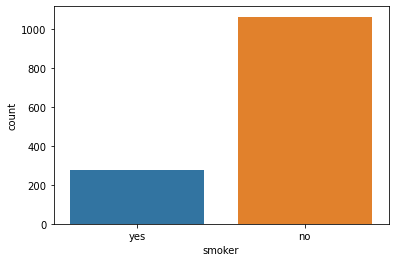

In [97]:
sns.countplot(x='smoker',data=df)

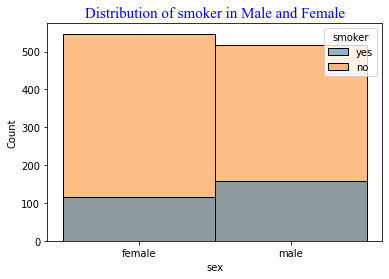

In [106]:
plt.title('Distribution of smoker in Male and Female',fontdict={'family':'times new roman','size':15,'color':'blue'})
sns.histplot(x='sex',data=df,hue='smoker',color='green')
plt.show()

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [115]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [116]:
df['sex']=le.fit_transform(df['sex'])

In [117]:
df['smoker']=le.fit_transform(df['smoker'])

In [118]:
df['region']=le.fit_transform(df['region'])

In [119]:
df.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [125]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [127]:
import numpy as np

In [128]:
x=np.array(df[['age','sex','bmi','children','smoker','region']])
y=np.array(df[['charges']])

In [129]:
x=ss.fit_transform(x)

In [130]:
df.shape

(1338, 7)

In [131]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()

In [132]:
from sklearn.model_selection import train_test_split
xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=0.25)

### Implementation from thecleverprogrammer

In [135]:
data = pd.read_csv("Health_insurance.csv")
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [136]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [137]:
data["sex"] = data["sex"].map({"female": 0, "male": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
print(data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [138]:
import plotly.express as px
pie = data["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values=population, names=regions)
fig.show()

In [139]:
print(data.corr())

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


In [140]:
x = np.array(data[["age", "sex", "bmi", "smoker"]])
y = np.array(data["charges"])

In [141]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [142]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [143]:
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(data.head())

   Predicted Premium Amount
0              11847.696434
1               5542.333267
2              28530.521888
3               9736.566936
4              35444.584074
